---

# **Business Case : Confidence Interval and CLT**

The Management team at a multi-national retail hypermarket gaint wants to **analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender** and the various other factors to help the business make better decisions.They want to understand **if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?** (Assume 50 million customers are male and 50 million are female).


The company collected the transactional data of customers who purchased products from the Stores during Black Friday

## **Data Pre-Processing**

Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Dataset

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Shape of the dataset

In [ ]:
df.shape

(550068, 10)

Printing all the columns in the dataset

In [ ]:
for i in df.columns:
  print(i)

User_ID
Product_ID
Gender
Age
Occupation
City_Category
Stay_In_Current_City_Years
Marital_Status
Product_Category
Purchase


Unique values for each column

In [ ]:
cols = df.columns
for col in cols:
  unique_vals = df[col].unique()
  print(f"{col}: {unique_vals}")

User_ID: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Marital_Status: [0 1]
Product_Category: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Purchase: [ 8370 15200  1422 ...   135   123   613]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Checking for Null & Duplicate values

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

No Null and Duplicate values in the data

In [ ]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

## **Exploratory Data Analysis**

### Univariate Analysis

#### Distribution of Purchases

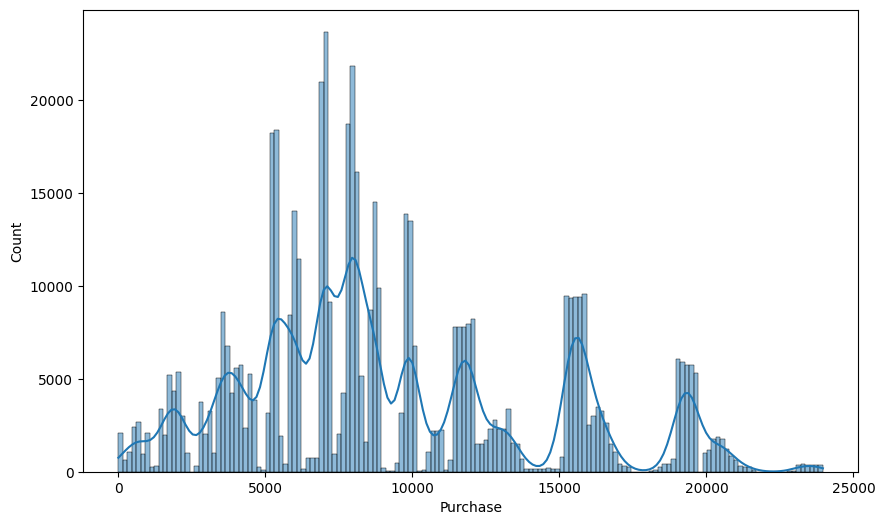

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

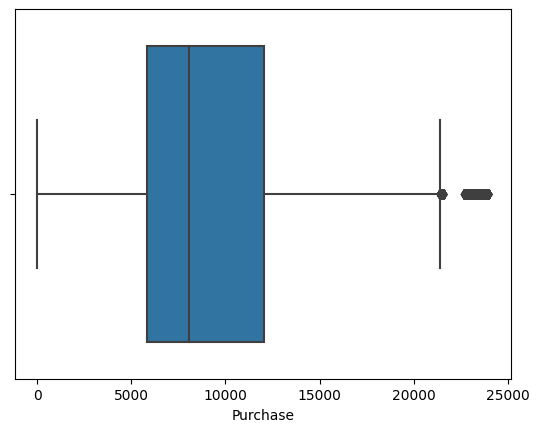

In [ ]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

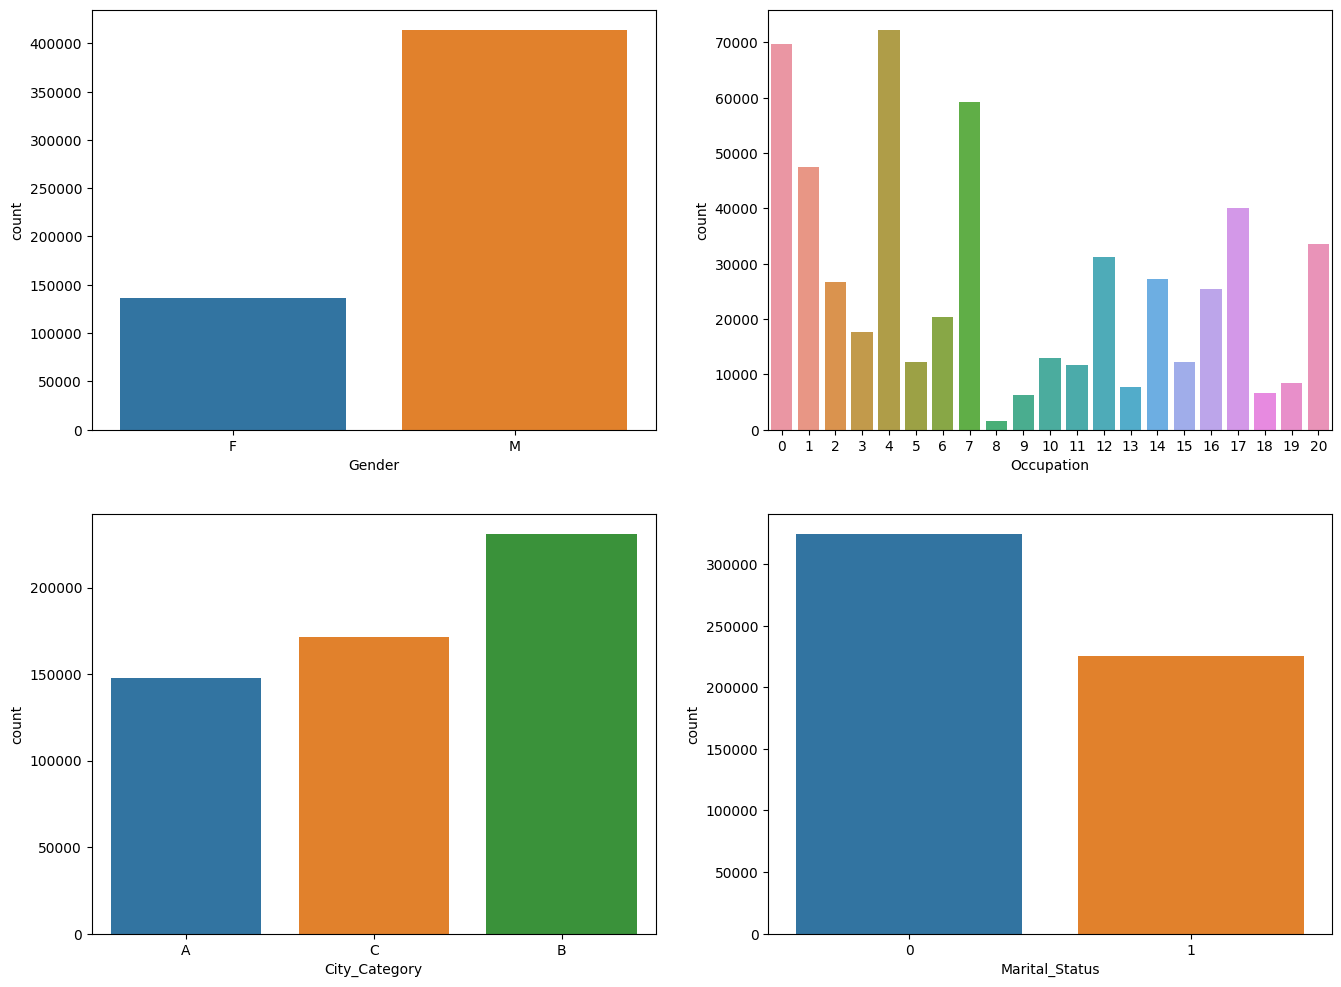

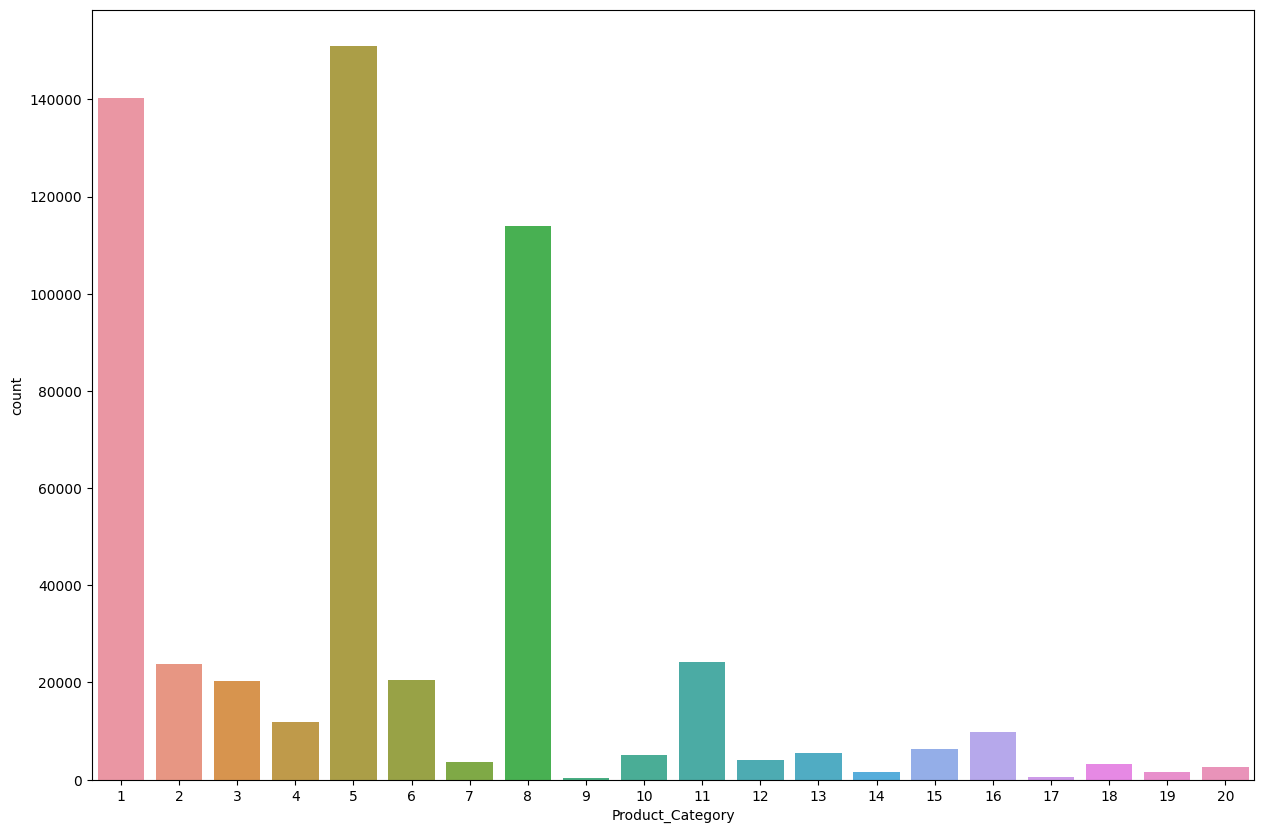

In [ ]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Product_Category')
plt.show()


- Most of the customers are Male
- There are 20 different types of Occupation and Product_Category
- More customers belong to B City_Category
- More customers are Single as compare to Married
- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

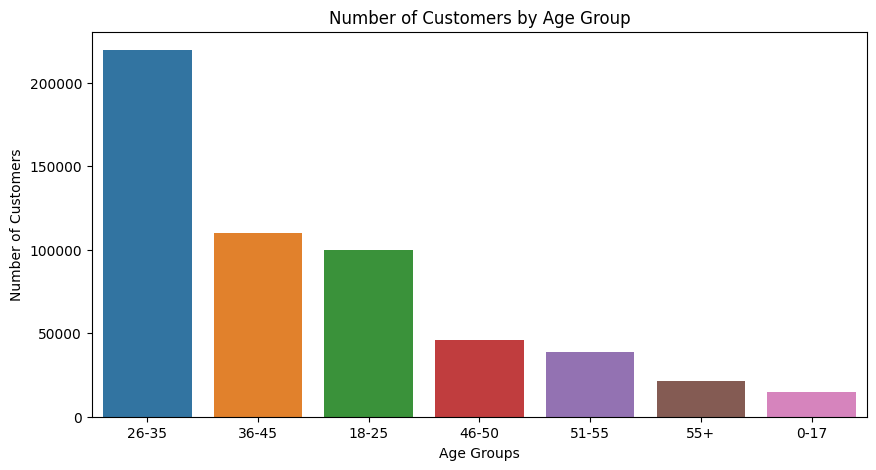

In [ ]:
age_group_counts = df['Age'].value_counts()

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group')
plt.show()

- Majority of the customers belong to the age-group of (26 - 35)
- Very less number of customers belong to the age-group of (0 - 17)

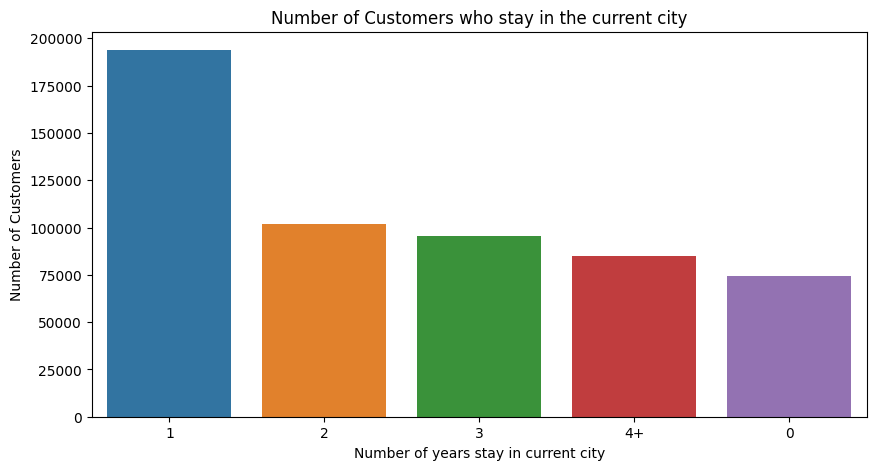

In [ ]:
SICY = df['Stay_In_Current_City_Years'].value_counts()

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x=SICY.index, y=SICY.values)
plt.xlabel('Number of years stay in current city')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who stay in the current city')
plt.show()

- Number of customers who have been staying in the current city for **" 1 "** year are more.

### Bivariate Analysis

#### Distribution of Purchases by Age

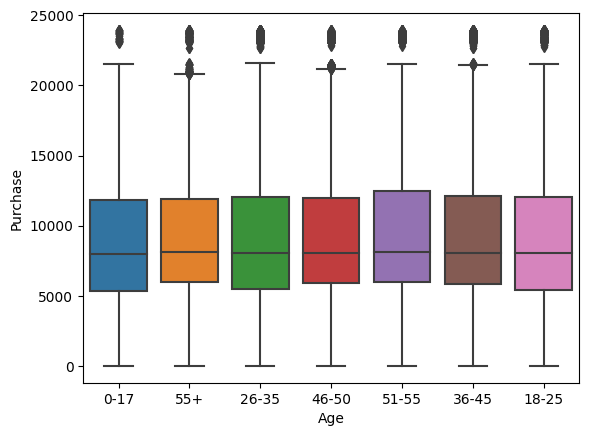

In [ ]:
sns.boxplot(data=df, x='Age', y='Purchase')
plt.show()

- Almost all the Age Groups have the same Median purchase Value

#### Distribution of Purchases by Gender

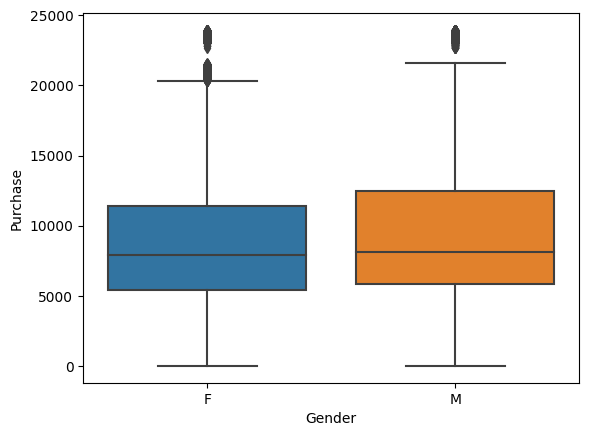

In [ ]:
sns.boxplot(data=df, x='Gender', y='Purchase')
plt.show()

- Median purchase of Male customers is more than Female customers
- Female customers have more outliers

#### Distribution of Purchases by Marital Status

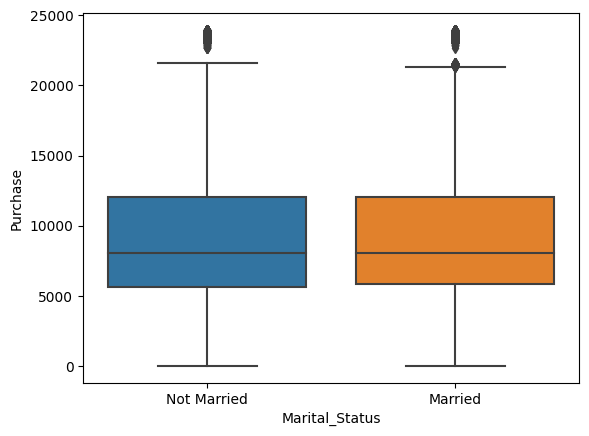

In [ ]:
sns.boxplot(data=df, x='Marital_Status', y='Purchase')
plt.xticks([0, 1], ['Not Married', 'Married'])
plt.show()

- Both Married and Unmarried customers have the same median purchase value
- Married customers have more outliers

#### Distribution of Purchases by City Category

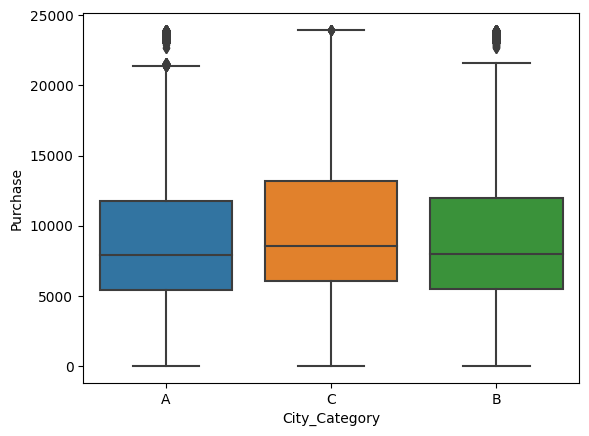

In [ ]:
sns.boxplot(data=df, x='City_Category', y='Purchase')
plt.show()

- Median purchase value of the customers of City " C " is greater than other two cities

### Multivariate Analysis

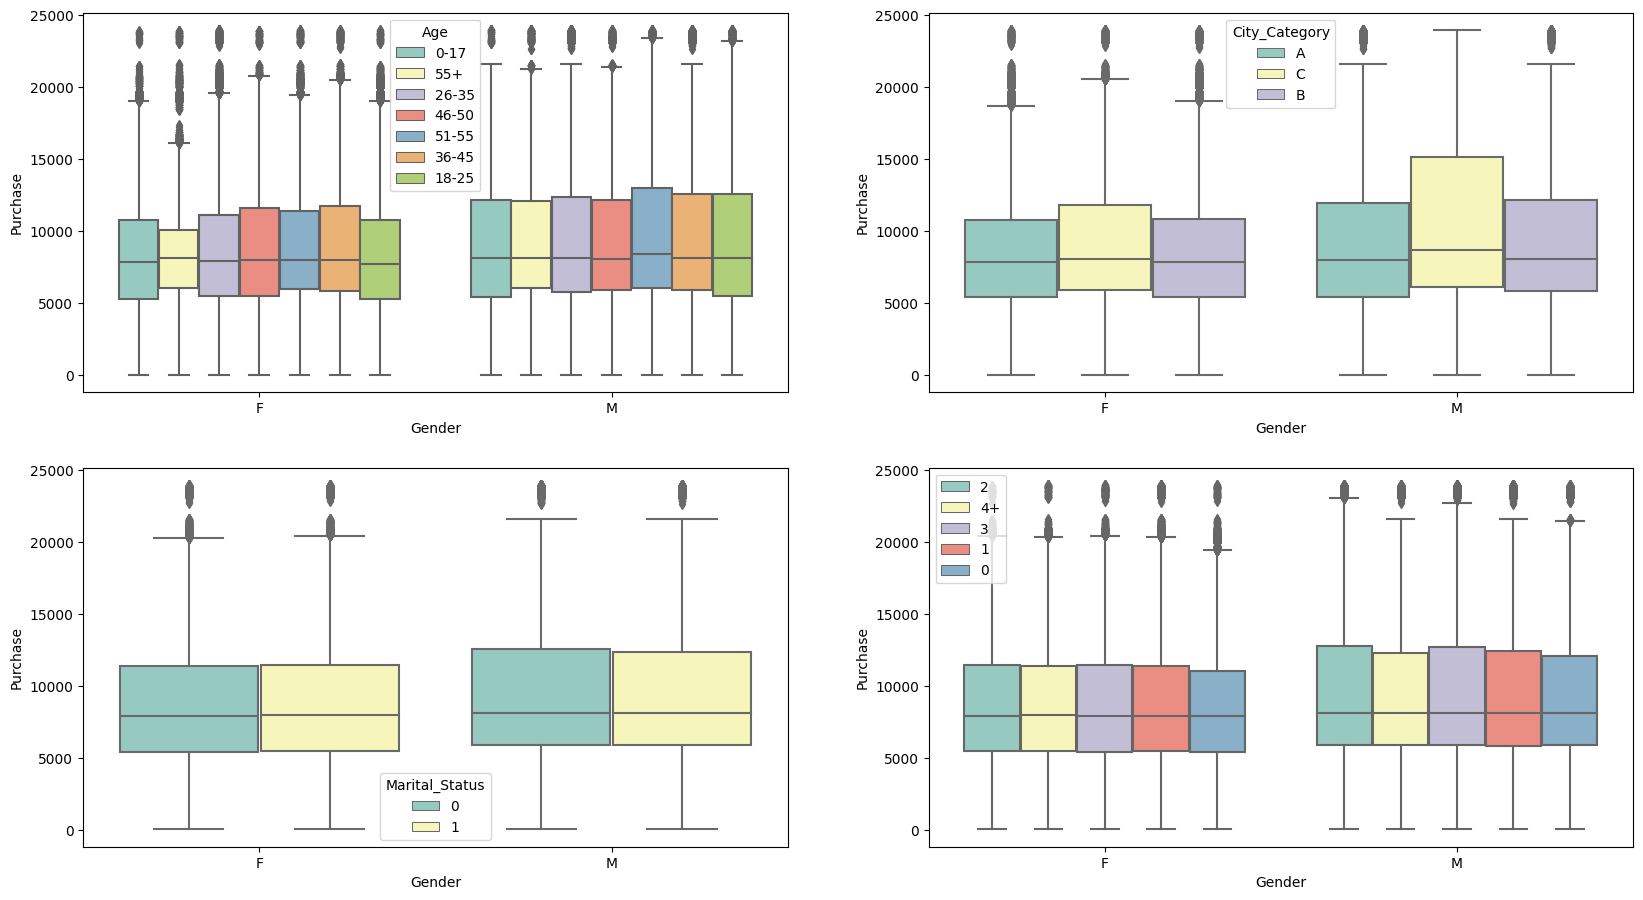

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

## **Application of Central Limit Theorem**

In [ ]:
user_purchase_data = df.groupby(['User_ID','Gender'])[['Purchase']].sum()
user_purchase_data = user_purchase_data.reset_index()
user_purchase_data

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
male_purchase_data = user_purchase_data.loc[user_purchase_data['Gender'] =='M']['Purchase']
female_purchase_data = user_purchase_data.loc[user_purchase_data['Gender'] =='F']['Purchase']

In [ ]:
male_avg = male_purchase_data.mean()
female_avg = female_purchase_data.mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


- From these observations, Male customers spend more than Female customers on an average

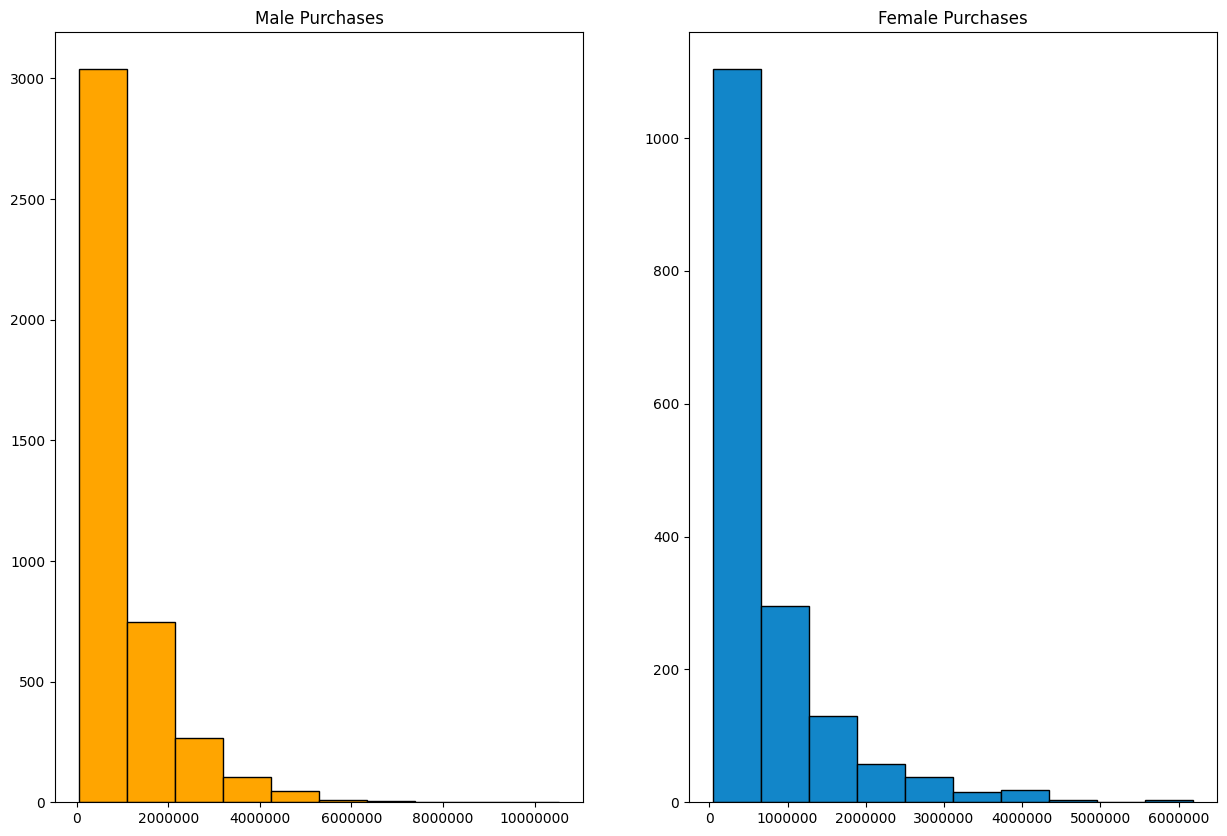

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Male Purchases')
plt.hist(male_purchase_data,edgecolor='black', color = 'orange')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(1,2,2)
plt.title('Female Purchases')
plt.hist(female_purchase_data, edgecolor='black', color = '#1286c9')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Confidence Interval for Male Customers

#### For sample size = 50

In [ ]:
import numpy as np

male_customers = male_purchase_data

sample_size = 50

np.random.seed(0)
male_customers_sample = np.random.choice(male_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_male, ci_upper_male = bootstrap_ci(male_customers_sample, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a Male customer will lie between: [{ci_lower_male:.2f}, {ci_upper_male:.2f}]")

90 % of times, the average amount spent by a Male customer will lie between: [806357.35, 1190050.63]
95 % of times, the average amount spent by a Male customer will lie between: [770413.09, 1225855.80]
99 % of times, the average amount spent by a Male customer will lie between: [715961.10, 1304856.05]


#### For sample size = 500

In [ ]:
import numpy as np

male_customers = male_purchase_data

sample_size = 500

np.random.seed(0)
male_customers_sample1 = np.random.choice(male_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_male, ci_upper_male = bootstrap_ci(male_customers_sample1, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a Male customer will lie between: [{ci_lower_male:.2f}, {ci_upper_male:.2f}]")

90 % of times, the average amount spent by a Male customer will lie between: [863115.30, 1001983.71]
95 % of times, the average amount spent by a Male customer will lie between: [850807.46, 1017761.75]
99 % of times, the average amount spent by a Male customer will lie between: [825770.25, 1045427.32]


#### For sample size = 5000

In [ ]:
import numpy as np

male_customers = male_purchase_data

sample_size = 5000

np.random.seed(0)
male_customers_sample2 = np.random.choice(male_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_male, ci_upper_male = bootstrap_ci(male_customers_sample2, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a Male customer will lie between: [{ci_lower_male:.2f}, {ci_upper_male:.2f}]")

90 % of times, the average amount spent by a Male customer will lie between: [903133.03, 950322.90]
95 % of times, the average amount spent by a Male customer will lie between: [899102.23, 954216.52]
99 % of times, the average amount spent by a Male customer will lie between: [890315.20, 963679.37]


#### For sample size = 50000

In [ ]:
import numpy as np

male_customers = male_purchase_data

sample_size = 50000

np.random.seed(0)
male_customers_sample3 = np.random.choice(male_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_male, ci_upper_male = bootstrap_ci(male_customers_sample3, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a Male customer will lie between: [{ci_lower_male:.2f}, {ci_upper_male:.2f}]")

90 % of times, the average amount spent by a Male customer will lie between: [918286.93, 932585.87]
95 % of times, the average amount spent by a Male customer will lie between: [916566.36, 933961.12]
99 % of times, the average amount spent by a Male customer will lie between: [913845.94, 936400.18]


#### Sample Distribution for Different Sample Sizes - Male Purchases

<Figure size 2000x1000 with 0 Axes>

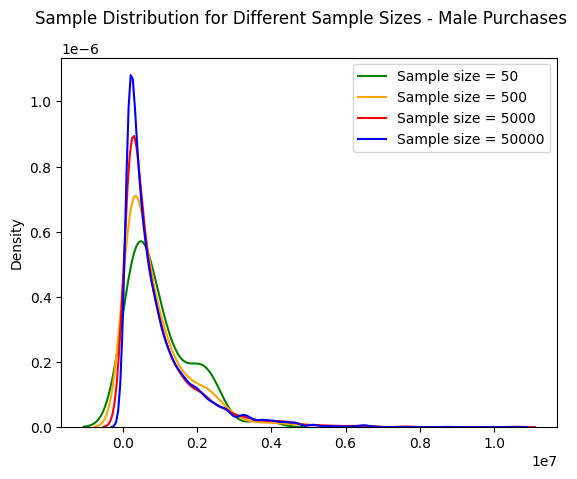

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
fig, ax = plt.subplots()

plt.suptitle("Sample Distribution for Different Sample Sizes - Male Purchases")

sns.kdeplot(data=male_customers_sample, color='green', ax=ax, label='Sample size = 50')

sns.kdeplot(data=male_customers_sample1, color='orange', ax=ax, label='Sample size = 500')


sns.kdeplot(data=male_customers_sample2, color='red', ax=ax, label='Sample size = 5000')

sns.kdeplot(data=male_customers_sample3, color='blue', ax=ax, label='Sample size = 50000')

ax.legend()
plt.show()

- We can observe from the KDE plots of different sample size, 'As the sample size **increases**, the distribution of the sample mean becomes **more normal** and its standard deviation **decreases**. This results in **"narrower"** confidence intervals, i.e as Sample Size **increases**, **Thinner** will be the Bell Curve and vice-versa.

### Confidence Interval for Female Customers

#### For sample size = 50

In [ ]:
import numpy as np

female_customers = female_purchase_data

sample_size = 50

np.random.seed(0)
female_customers_sample = np.random.choice(female_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_female, ci_upper_female = bootstrap_ci(female_customers_sample, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a Female customer will lie between: [{ci_lower_female:.2f}, {ci_upper_female:.2f}]")

90 % of times, the average amount spent by a Female customer will lie between: [455776.39, 670358.79]
95 % of times, the average amount spent by a Female customer will lie between: [436861.52, 690786.66]
99 % of times, the average amount spent by a Female customer will lie between: [397620.76, 732500.97]


#### For sample size = 500

In [ ]:
import numpy as np

female_customers = female_purchase_data

sample_size = 500

np.random.seed(0)
female_customers_sample1 = np.random.choice(female_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_female, ci_upper_female = bootstrap_ci(female_customers_sample1, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a Female customer will lie between: [{ci_lower_female:.2f}, {ci_upper_female:.2f}]")

90 % of times, the average amount spent by a Female customer will lie between: [717856.47, 858753.91]
95 % of times, the average amount spent by a Female customer will lie between: [704940.99, 874359.96]
99 % of times, the average amount spent by a Female customer will lie between: [681107.00, 903766.05]


#### For sample size = 5000

In [ ]:
import numpy as np

female_customers = female_purchase_data

sample_size = 5000

np.random.seed(0)
female_customers_sample2 = np.random.choice(female_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_female, ci_upper_female = bootstrap_ci(female_customers_sample2, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a Female customer will lie between: [{ci_lower_female:.2f}, {ci_upper_female:.2f}]")

90 % of times, the average amount spent by a Female customer will lie between: [695495.09, 734342.75]
95 % of times, the average amount spent by a Female customer will lie between: [692249.49, 737591.51]
99 % of times, the average amount spent by a Female customer will lie between: [684933.98, 745069.35]


#### For sample size = 50000

In [ ]:
import numpy as np

female_customers = female_purchase_data

sample_size = 50000

np.random.seed(0)
female_customers_sample3 = np.random.choice(female_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_female, ci_upper_female = bootstrap_ci(female_customers_sample3, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a Female customer will lie between: [{ci_lower_female:.2f}, {ci_upper_female:.2f}]")

90 % of times, the average amount spent by a Female customer will lie between: [703912.74, 715911.80]
95 % of times, the average amount spent by a Female customer will lie between: [702877.27, 717282.97]
99 % of times, the average amount spent by a Female customer will lie between: [700688.51, 719423.09]


#### Sample Distribution for Different Sample Sizes - Female Purchases

<Figure size 2000x1000 with 0 Axes>

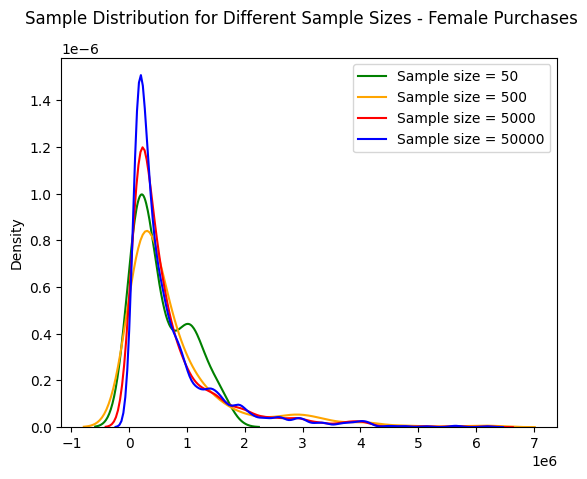

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
fig, ax = plt.subplots()

plt.suptitle("Sample Distribution for Different Sample Sizes - Female Purchases")

sns.kdeplot(data=female_customers_sample, color='green', ax=ax, label='Sample size = 50')

sns.kdeplot(data=female_customers_sample1, color='orange', ax=ax, label='Sample size = 500')


sns.kdeplot(data=female_customers_sample2, color='red', ax=ax, label='Sample size = 5000')

sns.kdeplot(data=female_customers_sample3, color='blue', ax=ax, label='Sample size = 50000')

ax.legend()
plt.show()

- Same observation as Male Customer Purchases

##### **Observations from the Confidence Intervals of Male vs Female customers w.r.t spending**

- The 95% confidence intervals for the average amount spent by male and female customers do not overlap. This means that we can be 95% confident that the true average amount spent by male customers is different from the true average amount spent by female customers.

- Similarly for all the other Confidence Intervals, irrespective of the sample size, they don't overlap, which indicates that **" There is a statistically significant difference between the average amount spent by male and female customers "**. This difference is not due to chance.

- This means that, on average, Male customers spend more than Female customers.


**Business Recommendations**

- Target male customers with more expensive products and services.

- Although the average amount spent by female customers is lower than the average amount spent by male customers, there is still a large market of female customers who are willing to spend money on products and services. It can target this market by developing products and services that are specifically designed for women. Explore opportunities to increase spending by female customers.



### Confidence Interval for Married Customers

In [ ]:
user_purchase_data_marital_status = df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum()
user_purchase_data_marital_status = user_purchase_data_marital_status.reset_index()
user_purchase_data_marital_status

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
married_purchase_data = user_purchase_data_marital_status.loc[user_purchase_data_marital_status['Marital_Status'] == 1]['Purchase']
unmarried_purchase_data = user_purchase_data_marital_status.loc[user_purchase_data_marital_status['Marital_Status'] == 0]['Purchase']

In [ ]:
married_avg = married_purchase_data.mean()
unmarried_avg = unmarried_purchase_data.mean()

print("Average amount spend by Married customers: {:.2f}".format(married_avg))
print("Average amount spend by Unmarried customers: {:.2f}".format(unmarried_avg))

Average amount spend by Married customers: 843526.80
Average amount spend by Unmarried customers: 880575.78


- Unmarried customers spend more than Married customers on an average.

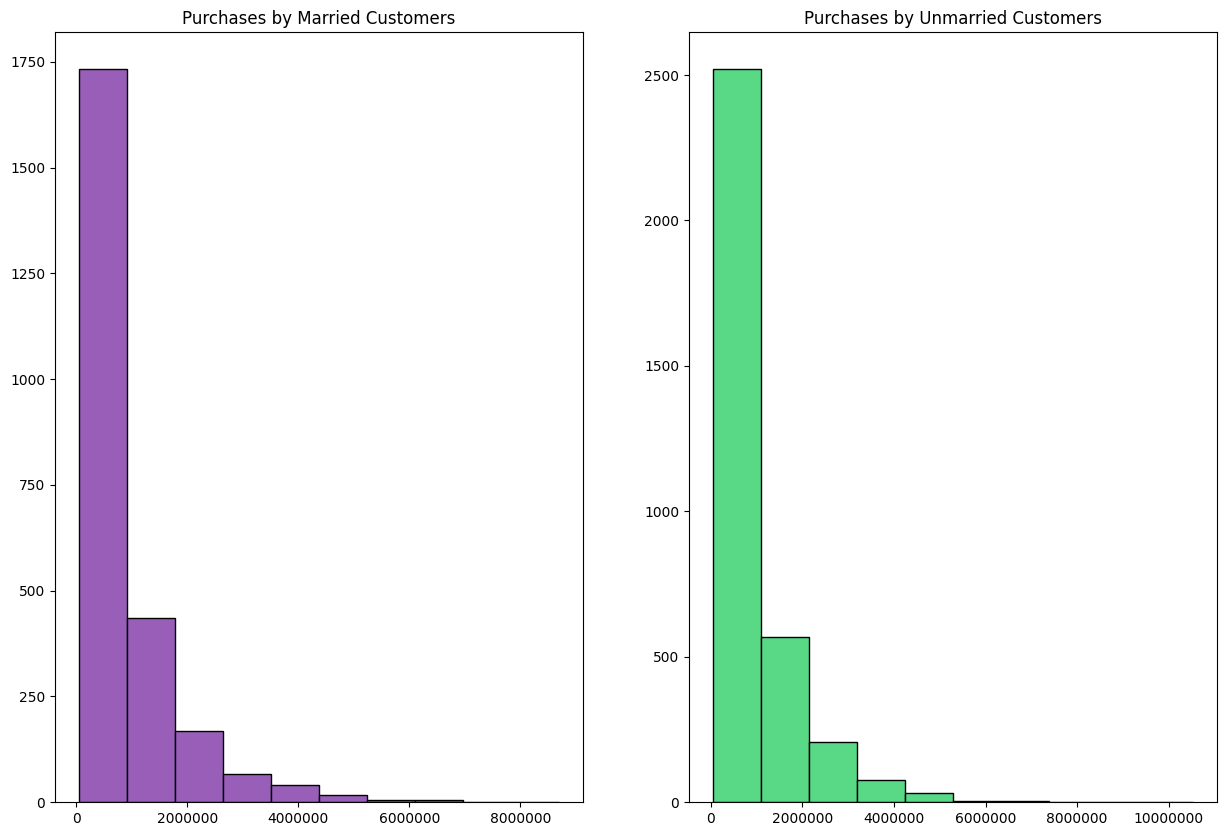

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Purchases by Married Customers')
plt.hist(married_purchase_data,edgecolor='black',color='#985eb8')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(1,2,2)
plt.title('Purchases by Unmarried Customers')
plt.hist(unmarried_purchase_data, edgecolor='black',color='#59d986')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### For sample size = 5000

In [ ]:
married_customers = married_purchase_data

sample_size = 5000

np.random.seed(0)
married_customers_sample = np.random.choice(married_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_married, ci_upper_married = bootstrap_ci(married_customers_sample, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a customer who is Married will lie between: [{ci_lower_married:.2f}, {ci_upper_married:.2f}]")

90 % of times, the average amount spent by a customer who is Married will lie between: [807082.67, 849905.00]
95 % of times, the average amount spent by a customer who is Married will lie between: [802883.37, 854597.15]
99 % of times, the average amount spent by a customer who is Married will lie between: [794934.00, 861568.35]


#### For sample size = 50000

In [ ]:
married_customers = married_purchase_data

sample_size = 50000

np.random.seed(0)
married_customers_sample = np.random.choice(married_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_married, ci_upper_married = bootstrap_ci(married_customers_sample, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a customer who is Married will lie between: [{ci_lower_married:.2f}, {ci_upper_married:.2f}]")

90 % of times, the average amount spent by a customer who is Married will lie between: [831387.55, 844872.75]
95 % of times, the average amount spent by a customer who is Married will lie between: [829996.77, 845983.83]
99 % of times, the average amount spent by a customer who is Married will lie between: [827714.19, 848584.07]


### Confidence Interval for Unmarried Customers

#### For sample size = 5000

In [ ]:
unmarried_customers = unmarried_purchase_data

sample_size = 5000

np.random.seed(0)
unmarried_customers_sample = np.random.choice(unmarried_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_unmarried, ci_upper_unmarried = bootstrap_ci(unmarried_customers_sample, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a customer who is Unmarried will lie between: [{ci_lower_unmarried:.2f}, {ci_upper_unmarried:.2f}]")

90 % of times, the average amount spent by a customer who is Unmarried will lie between: [870847.07, 915432.31]
95 % of times, the average amount spent by a customer who is Unmarried will lie between: [866803.39, 920135.37]
99 % of times, the average amount spent by a customer who is Unmarried will lie between: [857126.94, 929015.79]


#### For sample size = 50000

In [ ]:
unmarried_customers = unmarried_purchase_data

sample_size = 50000

np.random.seed(0)
unmarried_customers_sample = np.random.choice(unmarried_customers, size=sample_size, replace=True)

def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

confidence_levels = [0.90, 0.95, 0.99]
for confidence_level in confidence_levels:
    ci_lower_unmarried, ci_upper_unmarried = bootstrap_ci(unmarried_customers_sample, confidence_level)
    print(f"{confidence_level*100:.0f} % of times, the average amount spent by a customer who is Unmarried will lie between: [{ci_lower_unmarried:.2f}, {ci_upper_unmarried:.2f}]")

90 % of times, the average amount spent by a customer who is Unmarried will lie between: [871520.01, 885576.95]
95 % of times, the average amount spent by a customer who is Unmarried will lie between: [870191.60, 886597.26]
99 % of times, the average amount spent by a customer who is Unmarried will lie between: [867710.37, 889375.92]


##### **Observations from the Confidence Intervals of Married vs Unmarried customers w.r.t spending**

- The 95% confidence interval for the average amount spent by a customer who is **Married** is **[802883.37, 854597.15]**, while the 95% confidence interval for the average amount spent by a customer who is **Unmarried** is **[866803.39, 920135.37]**. Since these two intervals do not overlap, we can conclude that **there is a statistically significant difference between the average amount spent by customers who are Married and those who are Unmarried**

- So, irrespective of the Sample Size, we can be 95% confident that the true population mean of the amount spent by Married customers is different from the true population mean of the amount spent by Unmarried customers


**Business Recommendations**

- Create targeted advertisements or promotions that appeal specifically to Married or Unmarried customers based on their spending patterns.

- Collecting additional data on customer demographics, preferences, and behaviors, and using advanced analytics techniques to identify patterns and relationships.

### Confidence Interval by Age

In [ ]:
age_purchases_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
age_purchases_df = age_purchases_df.reset_index()
age_purchases_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [ ]:
def bootstrap_ci(data, confidence_level):
    n = len(data)
    reps = 10000
    bootstrap_means = np.zeros(reps)
    for i in range(reps):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper

age_groups = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
confidence_levels = [0.95]

for age_group in age_groups:
    print(f"Age group: {age_group}")
    age_data = age_purchases_df[age_purchases_df['Age'] == age_group]['Purchase']
    for confidence_level in confidence_levels:
        ci_lower, ci_upper = bootstrap_ci(age_data, confidence_level)
        print(f"\t{confidence_level*100:.0f}% of times, the average amount spent by a customer in the {age_group} age group will lie between: [{ci_lower:.2f}, {ci_upper:.2f}]")

Age group: 26-35
	95% of times, the average amount spent by a customer in the 26-35 age group will lie between: [945456.53, 1034673.21]
Age group: 36-45
	95% of times, the average amount spent by a customer in the 36-45 age group will lie between: [824010.44, 937682.61]
Age group: 18-25
	95% of times, the average amount spent by a customer in the 18-25 age group will lie between: [802847.18, 909051.18]
Age group: 46-50
	95% of times, the average amount spent by a customer in the 46-50 age group will lie between: [715735.98, 873156.97]
Age group: 51-55
	95% of times, the average amount spent by a customer in the 51-55 age group will lie between: [693262.01, 834518.67]
Age group: 55+
	95% of times, the average amount spent by a customer in the 55+ age group will lie between: [479968.23, 605767.80]
Age group: 0-17
	95% of times, the average amount spent by a customer in the 0-17 age group will lie between: [534910.68, 715266.18]


##### **Observations from the Confidence Intervals of Different Age Groups**


None of the confidence intervals for the average amount spent by customers in different age groups overlap. This means that **we can be 95% confident that the true average amount spent by customers in each age group is different from the true average amount spent by customers in all other age groups**.


**Business Recommendations**

- The age group with the highest average amount spent is the **26-35** age group, with a 95% confidence interval of **[945456.53, 1034673.21]**. The age group with the lowest average amount spent is the **55+** age group, with a 95% confidence interval of **[479968.23, 605767.80]**.

- Segment customers by age and tailor marketing and sales strategies accordingly.

- Collecting additional data on customer demographics, preferences, and behaviors, and using advanced analytics techniques to identify patterns and relationships.

- Since some age groups spend less on average than others, there may be opportunities to increase spending by customers in these lower-spending age groups by offering them more value or incentives.

## **Conclusions**

-  The customer base is dominated by Male customers, who tend to spend more than Female customers on average

- Most of the customers are young adults ( 26-35 years old ) and Unmarried. Very few customers belong to the age group of ( 0-17 )

- The customers have diverse occupations and product preferences, but product categories 1, 5, 8, and 11 are the most popular ones.

- The customers have different durations of stay in the current city, but most of them have been living there for one year.

**Confidence Interval by Gender**

- Average amount spent by Male customers is greater than Female customers
 - Average amount spend by Male customers: 925344.40
 - Average amount spend by Female customers: 712024.39.

    Now we can infer from CLT about the population that, 95% of the times:

    - Average amount spent by a Male customer will lie between: (899102.23, 954216.52)
    - Average amount spent by a Female customer will lie between: (692249.49, 737591.51)


**Confidence Interval by Marital Status**

- Unmarried customers spend more than Married customers
  - Average amount spend by Married customers: 843526.80
  - Average amount spend by Unmarried customers: 880575.78

    Now we can infer from CLT about the population that, 95% of the times:

    - Married confidence interval of means: (802883.37, 854597.15)
    - Unmarried confidence interval of means: (866803.39, 920135.37)

**Confidence Interval by Age**

  - Age group: 26-35 : The average amount spent by a customer will lie between: (945456.53, 1034673.21)
  - Age group: 36-45 : The average amount spent by a customer will lie between: (824010.44, 937682.61)
  - Age group: 18-25 : The average amount spent by a customer will lie between: (802847.18, 909051.18)
  - Age group: 46-50 : The average amount spent by a customer will lie between: (715735.98, 873156.97)
  - Age group: 51-55 : The average amount spent by a customer will lie between: (693262.01, 834518.67)
  - Age group: 55+ : The average amount spent by a customer will lie between: (479968.23, 605767.80)
  - Age group: 0-17 : The average amount spent by a customer will lie between: (534910.68, 715266.18)


We can conclude that there are **significant** differences in the average amount spent by customers across different groups based on gender, marital status, and age.



## **Recommendations**

-  The business should target male customers, as they have higher purchasing power and frequency than female customers. Target male customers with more expensive products and services.

- The business should also focus on attracting and retaining female customers, as they represent a large potential market that is currently under-served.

- Create products and services that appeal to unmarried customers. Unmarried customers spend more money on average than married customers.

- Offer discounts and promotions to customers who have been staying in the current city for 1 year. These customers are more likely to be loyal customers.

- The business should expand its presence and reach in city C, as it has the highest median purchase value among the three cities. Male customers living in City Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help increase the revenue.

- The business should design marketing campaigns and products that appeal to different age groups, especially the young adults (26-35 years old) who are the majority of the customers.

- The business should segment the customers based on their occupation and product preferences, and offer personalized recommendations and promotions to increase customer satisfaction and loyalty.



---

